# Series de Fourier

**Objetivo.** Visualizar y entender cómo a través de una serie infinita de senos y cosenos podemos construir a una función periódica $f(x)$.

In [2]:
#Importamos las librerías que se utilizarán es este tema
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib
import ipywidgets as widgets

## Introducción.

Las series de Fourier son una herramienta matemática fundamental que nos permite descomponer funciones periódicas en sumas de senos y cosenos. Cualquier función periódica bien comportada puede expresarse como una combinación infinita de estos términos sinusoidales.

La teoría de las series de Fourier es bastante complicada, pero la aplicación de estas series es simple. Las series de Fourier son, en cierto sentido, más universales que las series de Taylor, ya que muchas funciones periódicas discontinuas pueden desarrollarse en serie de Fourier, pero, desde luego, no tienen representaciones en serie de Taylor.

Como aplicación constituyen una herramienta muy importante en la solución de problemas en los que intervienen ecuaciones diferenciales ordinarias y parciales.

## Definición.

Se define a una **serie de Fourier** como la representación de una función, $f(x)$, en una serie de senos y cosenos, tal que

$$
f(x) = \frac{a_0}{2} + \sum_{n = 1}^{\infty}a_n\cos(nx) + \sum_{n = 1}^{\infty}b_n\sin(nx) \tag{1}
$$

Donde los coeficientes $a_0$, $a_n$ y $b_n$ están relacionados con $f(x)$ a través de la siguientes integrales:

$$
a_n = \frac{1}{\pi}\int_{0}^{2\pi}f(s)\cos(ns)\,ds, \quad n = 0, 1, 2, \dots \tag{2}
$$

$$
b_n = \frac{1}{\pi}\int_{0}^{2\pi}f(s)\sin(ns)\,ds, \quad n = 1, 2, 3, \dots \tag{3}
$$

los cuales están sujetos a que dichas integrales existan.

En caso de que $f(x)$ sea una función periódica definida en el intervalo $[-l,l]$, se pueden redefinir las ecuaciones (1), (2) y (3) de la siguiente manera:

$$
f(x) = \frac{a_0}{2} + \sum_{n = 1}^{\infty}a_n\cos\left(\frac{n\pi x}{l}\right) + \sum_{n = 1}^{\infty}b_n\sin\left(\frac{n\pi x}{l}\right) \tag{4}
$$

Donde

$$
a_n = \frac{1}{l}\int_{-l}^{l}f(s)\cos\left(\frac{n\pi s}{l}\right)\,ds, \quad n = 0, 1, 2, \dots \tag{5}
$$


$$
b_n = \frac{1}{l}\int_{-l}^{l}f(s)\sin\left(\frac{n\pi s}{l}\right)\,ds, \quad n = 1, 2, 3, \dots \tag{6}
$$

<div class="alert alert-success">

### Serie de Fourier de la función "Dientes de Sierra".

<font color="black">
Se encontrará la serie de Fourier de la función $f(x)$ dada por

$$
f(x) = \begin{cases}
x & \text{si } ~~0\leq x < \pi\\
x - 2\pi & \text{si } ~~\pi < x \leq 2\pi
\end{cases}
$$

Para esto, se calcularán los coeficientes $a_n$ y $b_n$ usando las fórmulas (1) y (2).

$$
a_n = \frac{1}{\pi}\left[\int_{0}^{\pi} s\cos(ns)ds + \int_{\pi}^{2\pi}(s - 2\pi)\cos(ns)ds\right]
$$
Reacomodando

$$
a_n = \frac{1}{\pi}\left[\int_{0}^{2\pi} s\cos(ns)ds - 2\pi\int_{\pi}^{2\pi}\cos(ns)ds\right]
$$

Integrando el primer término por partes y resolviendo el segundo término se obtiene

$$
a_n = \left[\cancelto{=0}{\left.\frac{s}{n}\sin(ns)\right|_{s = 0}^{2\pi}} - \frac{1}{n}\int_{0}^{2\pi}\sin(ns)ds - \cancelto{=0}{\left.\frac{2\pi}{n}\sin(ns)\right|_{s = \pi}^{2\pi}}\right]
$$

$$
a_n = \left.\frac{1}{\pi n^2}\cos(ns)\right|_{s = 0}^{2\pi} = 0
$$

Por lo tanto, se encontró que $a_n = 0$ para $n = 0, 1, 2, \dots$

Por otro lado

$$
b_n = \frac{1}{\pi}\left[\int_{0}^{\pi} s\sin(ns)ds + \int_{\pi}^{2\pi}(s - 2\pi)\sin(ns)ds\right]
$$

Reacomodando

$$
b_n = \frac{1}{\pi}\left[\int_{0}^{2\pi} s\sin(ns)ds - 2\pi\int_{\pi}^{2\pi}\sin(ns)ds\right]
$$

En el primer término se hará integración por partes y se resolverá el segundo término 

$$
b_n = \frac{1}{\pi}\left[\left.-\frac{s}{n}\cos(ns)\right|_{s = 0}^{2\pi}- \cancelto{=0}{\frac{1}{n}\int_{0}^{2\pi}\cos(ns)ds} + \left.\frac{2\pi}{n}\cos(ns)\right|_{s = \pi}^{2\pi}\right]
$$

$$
b_n = \frac{1}{\pi}\left[-\frac{2\pi}{n}\cos(2n\pi) + \frac{2\pi}{n}(cos(2n\pi) - \cos(n\pi))\right]
$$

Usando que $\cos(n\pi) = (-1)^n$

$$
b_n = \frac{1}{\pi} \frac{2\pi}{n}(-1)(-1)^n
$$

$$
b_n = \frac{2}{n}(-1)^{n + 1}
$$

Por lo tanto, sustituyendo los coeficientes en nuestra serie de Fourier, obtenemos que

$$
f(x) = 2\sum_{n = 1}^{\infty}\frac{(-1)^{n + 1}}{n}\sin(nx) \tag{7}
$$


Este resultado nos ayudará a obtener una idea de la convergencia de la serie de Fourier y además mostrar qué es lo que sucede cuando tomamos solamente un número finito de términos de dicha serie.

A continuación se construirán dos gráficos en Phyton: el primero corresponderá a nustra función original, mientras que el segundo será uno que muestre como la serie de Fourier resultante (Ec. (7)) converge a la función original.

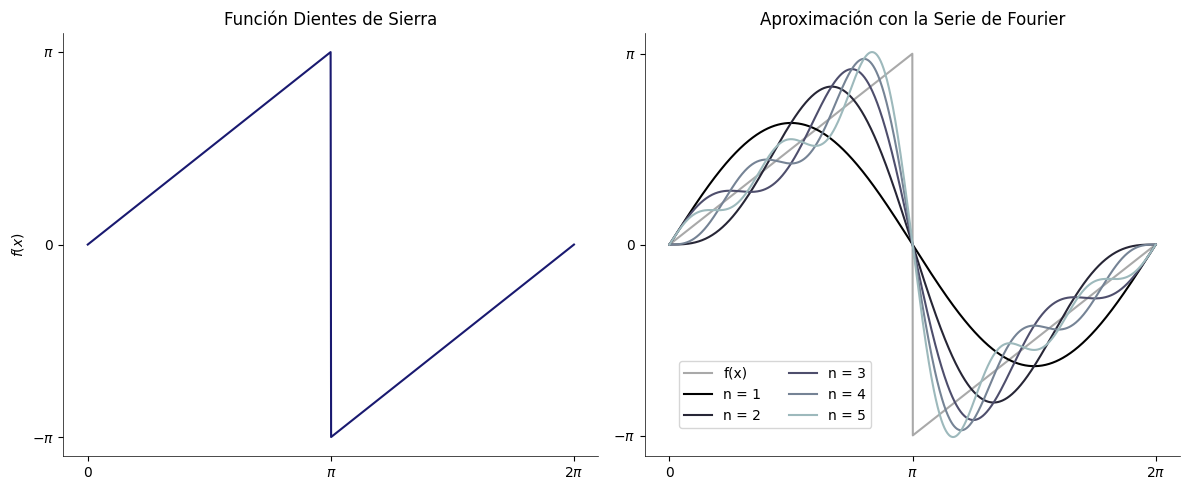

In [188]:
# Definimos el rango de x
x = np.linspace(0, 2 * np.pi, 1000)

# Función de Dientes de Sierra
def f(x):
    F = np.where((x >= 0) & (x < np.pi), x, x - 2 * np.pi)
    return F


plt.figure(figsize=(12, 5))

#----------------------------------------------------------Grafica 1---------------------------------------------------------------------------------------
ax1 = plt.subplot(1, 2, 1)
plt.plot(x, f(x),color='midnightblue')

#Colocamos los ejes cartesianos
ax1.spines[["left", "bottom"]]
ax1.spines[["left", "bottom"]].set_linewidth(0.5)
ax1.set_xticks(np.arange(x.min(), x.max()+0.5, 0.5))
ax1.set_yticks(np.arange(f(x).min(), f(x).max(), np.pi/2))

# Dividimos a los ejes en múltiplos de pi
Divisionx = np.arange(0, 3 * np.pi, np.pi)
marcasx = [r'$0$', r'$\pi$', r'$2\pi$']
plt.xticks(Divisionx, marcasx)

Divisiony = np.arange(-np.pi, 2 * np.pi, np.pi)
marcasy = [r'$-\pi$', r'$0$', r'$\pi$']
plt.yticks(Divisiony, marcasy)

#Eliminamos los bordes
ax1.spines[["top", "right"]].set_visible(False)

plt.title(r'Función Dientes de Sierra')
plt.ylabel(r'$f(x)$')
plt.grid(False)

#-----------------------------------------------------------Grafica 2---------------------------------------------------------------------------------------------------------------------------------------
ax2 = plt.subplot(1, 2, 2)
plt.plot(x, f(x), label = "f(x)", color="darkgray")
lineas = 5
cmap = mpl.colormaps['bone']
colors = cmap(np.linspace(0, 0.7, lineas))

#Aqui defnimos como son los terminos de nuestra serie de Fourier dados por (7)
def SF(n, x):
    serie = ((2 * (-1) ** (n + 1)) / n) * np.sin(n * x)
    return serie

fi = 0 

for n, color in enumerate(colors, start=1):
    fi += SF(n, x)
    plt.plot(x, fi, color=color, label = 'n = {}'.format(n))


#Colocamos los ejes cartesianos
ax2.spines[["left", "bottom"]]
ax2.spines[["left", "bottom"]].set_linewidth(0.5)
ax2.set_xticks(np.arange(x.min(), x.max()+0.5, 0.5))
ax2.set_yticks(np.arange(f(x).min(), f(x).max(), 0.5))

# Dividimos al eje x en múltiplos de pi
Divisionx = np.arange(0, 3 * np.pi, np.pi)
marcasx = [r'$0$', r'$\pi$', r'$2\pi$']
plt.xticks(Divisionx, marcasx)

# Dividimos al eje y en múltiplos de pi
Divisiony = np.arange(-np.pi, 2 * np.pi, np.pi)
marcasy = [r'$-\pi$', r'$0$', r'$\pi$']
plt.yticks(Divisiony, marcasy)

#Eliminamos los bordes
ax2.spines[["top", "right"]].set_visible(False)

plt.title(r'Aproximación con la Serie de Fourier')
plt.grid(False)
plt.legend(loc='lower left', bbox_to_anchor=(0.05,0.05), ncol = 2)

plt.tight_layout() # Espacio entre los subplots

plt.show()


Las gráficas muestran claramente que entre más términos de la serie de Fourier tomemos, el resultado converge cada vez más a nuestra función original.

Otro método para poder visualizarlo, será creando un gráfico dinámico que nos pérmita  ver cómo al aumentar la cantidad de términos de la serie de Fourier, el resultado será cada vez más idéntico a la función "Dientes de sierra".

A continuación se muestra el proceso de la creación de nuestro gráfico dinámico:

In [18]:
slider1 = widgets.IntSlider(min=1, max=200, step=1, description="n") #Creamos un Slider para cambiar la cantidad de términos de la serie.

#Función para conectar al Slider con la gráfica
def DientesSierra(a):

    #Definimos cada uno de los términos 
    def terminos(n, x):
        T = ((2 * (-1) ** (n + 1)) / n) * np.sin(n * x)
        return T

    ax = plt.gca()#Guardamos el nombre ax para ejecutar despues ax.spines
    x = np.linspace(0, 2 * np.pi, 1000) #Dominio x
    a = int(a) #Total de términos
    T = np.zeros_like(x)

    for n in range(1,a):
        T += terminos(n,x) #El ciclo for nos ayuda a ir sumando termino tras termino al ir aumentando el valor de n

    plt.plot(x, T, color='darkslategrey')
    
    # Dividimos a los ejes en múltiplos de pi
    Divisionx = np.arange(0, 3 * np.pi, np.pi)
    marcasx = [r'$0$', r'$\pi$', r'$2\pi$']
    plt.xticks(Divisionx, marcasx)

    Divisiony = np.arange(-np.pi, 2 * np.pi, np.pi)
    marcasy = [r'$-\pi$', r'$0$', r'$\pi$']
    plt.yticks(Divisiony, marcasy)

    #Eliminamos los bordes superior y derecho
    ax.spines.top.set_visible(False)
    ax.spines.right.set_visible(False)

    plt.title(r'Construcción de f(x) a través de su serie de Fourier')
    plt.ylabel(r'$f(x)$')
    plt.grid(False)
    plt.show()

widgets.interact(DientesSierra, a=slider1)

interactive(children=(IntSlider(value=1, description='n', max=200, min=1), Output()), _dom_classes=('widget-in…

<function __main__.DientesSierra(a)>

<div class="alert alert-success">

### Serie de Fourier de una función escalón.

<font color="black">
    
En este ejemplo trabajaremos con la función escalon de Heaviside pero solo en el intervalo $[-1,1]$. En este caso tendremos que:

$$
h(x) = \begin{cases}
0, & \text{si   $~~-1\leq x < 0$}\\
1, & \text{si   $~~~~~~~0 \leq x < 1$}
\end{cases}
$$

Para calcular los coeficientes, ocuparemos las ecuaciones $(5)$ y $(6)$ en donde podemos notar que $l = 1$.

$$
a_0 = \int_{-1}^{1} f(s)ds = \int_{0}^{1} ds = 1
$$

Calculando $a_n$ para $n = 1,2,\dots$

$$
a_n = \int_{-1}^{1} f(s)\cos(n\pi s)ds = \int_{0}^{1} \cos(n\pi s)ds
$$

$$
a_n = \left.\frac{1}{n\pi}\sin(n\pi s)\right|_{s = 0}^{1} = 0
$$

Calculando $b_n$ para $n = 1,2,\dots$

$$
b_n = \int_{-1}^{1} f(s)\sin(n\pi s)ds = \int_{0}^{1} \sin(n\pi s)ds
$$

$$
b_n = \left.-\frac{1}{n\pi}\cos(n\pi s)\right|_{s = 0}^{1}
$$

$$
b_n = \frac{1- (-1)^n}{n\pi}
$$

Notemos que si $n$ es par entonces $b_n = 0$, y si $n$ es impar entonces $b_n = 2/(n\pi)$. Por lo tanto:

$$
b_n = \frac{2}{n\pi}, \quad n =1, 3, 5, \dots
$$

Sustituyendo estos resultados en $(4)$ obtenemos que

$$
h(x) = \frac{1}{2} + \frac{2}{\pi}\sum_{n~\text{impar}}^{\infty}\frac{\sin(n\pi x)}{n}
$$

Al igual que el ejemplo anterior, se construirán dos gráficas; la primera será la de la función original y la segunda será la gráfica de las series de Fourier usando los primeros términos, la cual nos mostrará como es la convergencia a la función original.

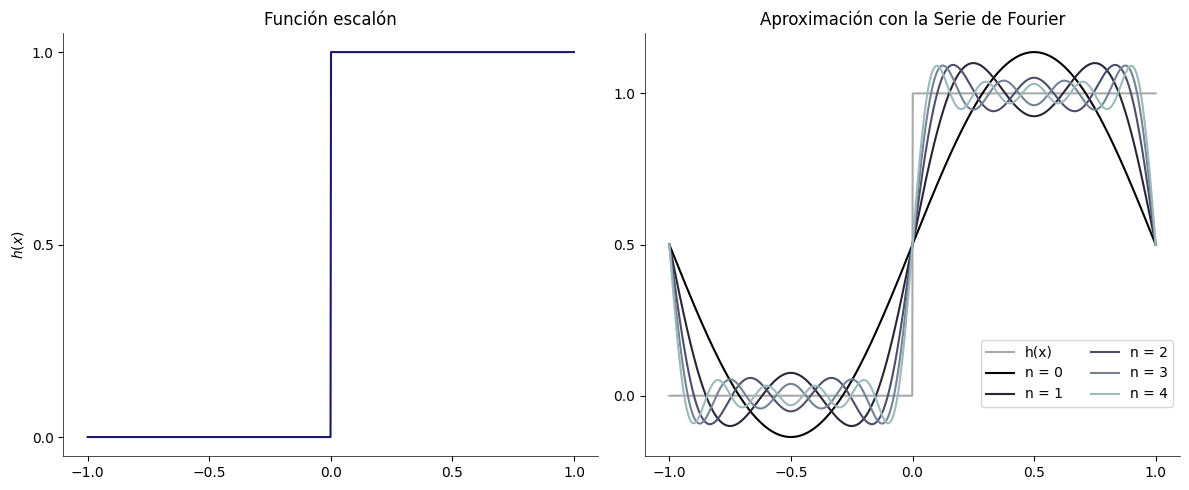

In [189]:
# Definimos el rango de x
x = np.linspace(-1, 1, 1000)
cmap = mpl.colormaps['bone']
colors = cmap(np.linspace(0, 0.7, lineas))

# Función escalón
def h(x):
    H = np.where((x >= -1) & (x < 0), 0, 1)
    return H


plt.figure(figsize=(12, 5))

#----------------------------------------------------------Grafica 1---------------------------------------------------------------------------------------
ax3 = plt.subplot(1, 2, 1)
plt.plot(x, h(x),color = 'midnightblue', linewidth=1.5)


#Colocamos los ejes cartesianos
ax3.spines[["left", "bottom"]]
ax3.spines[["left", "bottom"]].set_linewidth(0.5)
ax3.set_xticks(np.arange(x.min(), x.max()+0.5, 0.5))
ax3.set_yticks(np.arange(0, h(x).max()+0.5, 0.5))

#Eliminamos los bordes
ax3.spines[["top", "right"]].set_visible(False)

plt.title(r'Función escalón')
plt.ylabel(r'$h(x)$')
plt.grid(False)

#-----------------------------------------------------------Grafica 2---------------------------------------------------------------------------------------------------------------------------------------
ax4 = plt.subplot(1, 2, 2)
plt.plot(x, h(x), label = "h(x)", color="darkgray")
lineas = 5

#Aqui defnimos como son los terminos de nuestra serie de Fourier dados por (7)
def FS(n, x):
    Fserie = (2/((2*n+1)*np.pi)) * np.sin((2*n+1) *np.pi* x)
    return Fserie

f =0.5 #Recordemos que el primer término es de la serie es 1/2

for n, color in enumerate(colors, start=0):
    f += FS(n, x)
    plt.plot(x, f, color=color,label = 'n = {}'.format(n))
    


#Colocamos los ejes cartesianos
ax4.spines[["left", "bottom"]]
ax4.spines[["left", "bottom"]].set_linewidth(0.5)
ax4.set_xticks(np.arange(x.min(), x.max()+0.5, 0.5))
ax4.set_yticks(np.arange(0, h(x).max()+0.5, 0.5))

#Eliminamos los bordes
ax4.spines[["top", "right"]].set_visible(False)

plt.title(r'Aproximación con la Serie de Fourier')
plt.grid(False)
plt.legend(loc='lower right', bbox_to_anchor=(1,0.1), ncol = 2)

plt.tight_layout() # Espacio entre los subplots

plt.show()


Finalmente, se realizará un gráfico dinámico que nos muestre cómo al ir usando cada vez más terminos de la serie de Fourier, el resultado será cada vez más parecido a nuestra función escalón.

El proceso de creación de dicho gráfico es el siguiente:

In [17]:
slider2 = widgets.IntSlider(min=1, max=200, step=1, description="n") #Creamos un Slider para cambiar la cantidad de términos de la serie.

#Función para conectar al Slider con la gráfica
def Escalon(b):

    #Definimos cada uno de los términos 
    def Terminos(n, x):
        U = (2/((2*n+1)*np.pi)) * np.sin((2*n+1) *np.pi* x)
        return U


    ax0 = plt.gca()
    x = np.linspace(-1, 1, 1000) #Dominio x
    b = int(b) #Total de términos
    U = np.full_like(x, 0.5) #Nuestra serie inicia con el término 1/2

    for n in range(0,b):
        U += Terminos(n,x) #El ciclo for nos ayuda a ir sumando termino tras termino al ir aumentando el valor de n

    plt.plot(x, U, color='darkslategrey')
    
    # Dividimos los ejes
    Divisionx = np.arange(-1, 1.5 , 0.5)
    marcasx = [r'$-1$',r'$-0.5$', r'$0$', r'$0.5$', r'$1$']
    plt.xticks(Divisionx, marcasx)

    Divisiony = np.arange(0, 1.5 , 0.5)
    marcasy = [r'$0$', r'$0.5$', r'$1$']
    plt.yticks(Divisiony, marcasy)

    #Eliminamos los bordes superior y derecho
    ax0.spines.top.set_visible(False)
    ax0.spines.right.set_visible(False)

    plt.title(r'Construcción de h(x) a través de su serie de Fourier')
    plt.ylabel(r'$h(x)$')
    plt.grid(False)
    plt.show()

widgets.interact(Escalon, b=slider2)

interactive(children=(IntSlider(value=1, description='n', max=200, min=1), Output()), _dom_classes=('widget-in…

<function __main__.Escalon(b)>